# Install the package

First, you need to install the package from github and import it:

In [1]:
# Install the bulkhours package
!rm -rf bulkhours && git clone https://github.com/guydegnol/bulkhours.git

# import the bulkhours package
import bulkhours
import pandas as pd
import IPython
import statsmodels.tsa.api as smtsa
import matplotlib.pyplot as plt
import statsmodels.api as sm

bulkhours.init_env(email="dave.gahan@bulkhours.org", packages="descartes")

# Generate header links
bulkhours.generate_header_links("examples/6_Predict_Covid_Cases.ipynb")

Cloning into 'bulkhours'...
remote: Enumerating objects: 5468, done.
remote: Counting objects: 100% (1067/1067), done.
remote: Compressing objects: 100% (407/407), done.
remote: Total 5468 (delta 698), reused 975 (delta 622), pack-reused 4401
Receiving objects: 100% (5468/5468), 41.31 MiB | 22.80 MiB/s, done.
Resolving deltas: 100% (3535/3535), done.
RUN pip/apt install [colab]: descartes [0s],
Import BULK Helper cOURSe (version='5.2.23'🚀'):⚠️Database is local (security_level=0). Export your config file if you need persistency.⚠️
(db, subject, virtual_room, nb_id, user) = (free1.json, '', room1, '', dave.gahan@bulkhours.org✅)


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/guydegnol/bulkhours/blob/main/examples/6_Predict_Covid_Cases.ipynb) [![Open In Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/guydegnol/bulkhours/blob/main/examples/6_Predict_Covid_Cases.ipynb) [![GitHub](https://badgen.net/badge/icon/Open%20in%20Github?icon=github&label)](https://github.com/guydegnol/bulkhours/blob/main/examples/6_Predict_Covid_Cases.ipynb) [![Open in Visual Studio Code](https://img.shields.io/static/v1?logo=visualstudiocode&label=&message=Open%20in%20Visual%20Studio&labelColor=2c2c32&color=007acc&logoColor=007acc)](https://vscode.dev/github/guydegnol/bulkhours/blob/main/examples/6_Predict_Covid_Cases.ipynb) [![CC-by-nc-sa license](https://badgen.net/badge/icon/CC%20by-nc-sa?label=Licence)](https://creativecommons.org/licenses/by-nc-sa/4.0)


# Inégalités de revenus💢

Dans la cellule suivante, on représente les inegalités de revenus (à travers le coefficient de gini) pour différents pays.

<a href="https://example.com"></a>

In [2]:
%%evaluation_cell_id -i gini
# Get the data
world_data = bulkhours.get_data("world.mappoverty", credit=True, timeopt="last")

# Find the extremum quantities: min_name, min_gini, max_name, max_gini
min_name, min_gini = world_data['name'][world_data['gini'].idxmin()], world_data['gini'][world_data['gini'].idxmin()]
max_name, max_gini = world_data['name'][world_data['gini'].idxmax()], world_data['gini'][world_data['gini'].idxmax()]

# Highlight the extremum countries and some iconic ones
hightlight = [min_name, "France", "United States of America", "Brazil", max_name]
bulkhours.geo_plot(world_data, timeopt="last", column="gini", hightlight=hightlight)

# Conclude
IPython.display.Markdown(f"""
<h3>The least egalitarian country in the world ({world_data.year.max():.0f}) is the {max_name} (gini={max_gini:.2f}). The most egalitarian country in the world is the {min_name} (gini={min_gini:.2f})</h3>
""")

def student_evaluation_function():
    score = 0
    score += bulkhours.is_equal(student.min_name, teacher.min_name, max_score=2.5)
    score += bulkhours.is_equal(student.min_gini, teacher.min_gini, max_score=2.5)
    score += bulkhours.is_equal(student.max_name, teacher.max_name, max_score=2.5)
    score += bulkhours.is_equal(student.max_gini, teacher.max_gini, max_score=2.5)
    return score


Output()

# Predict covid cases🦠

**Prediction des cas de covid en France dans le prochain mois:**

#### Coronavirus Pandemic (COVID-19) data
- Raw data: [owid-covid-data.csv](https://covid.ourworldindata.org/data/owid-covid-data.csv)  ([raw](https://covid.ourworldindata.org/data/owid-covid-data.csv))
- Direct source: https://ourworldindata.org/coronavirus
- Reference site: https://covid19.who.int/data

<details>
  <summary>Show columns info</summary>
> https://github.com/owid/covid-19-data/tree/master/public/data/

| Column   |      Info |
|-----------|:-----------|
| iso_code |  |
| continent |  |
| location |  |
| total_cases |  |
| new_cases |  |
| new_cases_smoothed |  |
| total_deaths |  |
| new_deaths |  |
| new_deaths_smoothed |  |
| total_cases_per_million |  |
| new_cases_per_million |  |
| new_cases_smoothed_per_million |  |
| total_deaths_per_million |  |
| new_deaths_per_million |  |
| new_deaths_smoothed_per_million |  |
| reproduction_rate |  |
| icu_patients |  |
| icu_patients_per_million |  |
| hosp_patients |  |
| hosp_patients_per_million |  |
| weekly_icu_admissions |  |
| weekly_icu_admissions_per_million |  |
| weekly_hosp_admissions |  |
| weekly_hosp_admissions_per_million |  |
| total_tests |  |
| new_tests |  |
| total_tests_per_thousand |  |
| new_tests_per_thousand |  |
| new_tests_smoothed |  |
| new_tests_smoothed_per_thousand |  |
| positive_rate |  |
| tests_per_case |  |
| tests_units |  |
| total_vaccinations |  |
| people_vaccinated |  |
| people_fully_vaccinated |  |
| total_boosters |  |
| new_vaccinations |  |
| new_vaccinations_smoothed |  |
| total_vaccinations_per_hundred |  |
| people_vaccinated_per_hundred |  |
| people_fully_vaccinated_per_hundred |  |
| total_boosters_per_hundred |  |
| new_vaccinations_smoothed_per_million |  |
| new_people_vaccinated_smoothed |  |
| new_people_vaccinated_smoothed_per_hundred |  |
| stringency_index |  |
| population_density |  |
| median_age |  |
| aged_65_older |  |
| aged_70_older |  |
| gdp_per_capita |  |
| extreme_poverty |  |
| cardiovasc_death_rate |  |
| diabetes_prevalence |  |
| female_smokers |  |
| male_smokers |  |
| handwashing_facilities |  |
| hospital_beds_per_thousand |  |
| life_expectancy |  |
| human_development_index |  |
| population |  |
| excess_mortality_cumulative_absolute |  |
| excess_mortality_cumulative |  |
| excess_mortality |  |
| excess_mortality_cumulative_per_million |  |

</details>
         


BulkHours database info: https://github.com/guydegnol/bulkhours/blob/main/data/README.md
bulkhours.get_data("covid", credit=False)  # To stop showing this text


<h3>La situation devrait être sous controle dans le mois prochain en France.</h3>

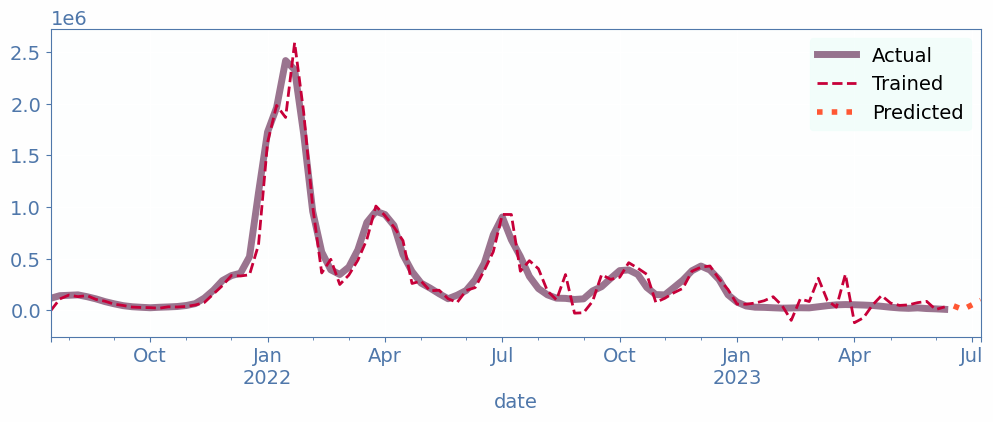

In [3]:
# Get the data (updated weekly)
covid = bulkhours.get_data("covid", credit=True, query="iso_code in ('FRA')", index="date")['new_cases']
covid = covid[covid > 0].iloc[-100:]
covid.index = pd.DatetimeIndex(covid.index).to_period('W')
model = smtsa.SARIMAX(covid, order=(3, 0, 0), seasonal_order=(1, 1, 0, 31)).fit()

# Plot the data
fig, ax = plt.subplots(figsize=(12, 4))
pd.Series(covid.values, index=covid.index.to_timestamp()).plot(ax=ax, label='Actual', alpha=0.6, lw=5, legend=True)
pd.Series(model.fittedvalues.values, index=covid.index.to_timestamp()).plot(ax=ax, label='Trained', ls="dashed", lw=2, legend=True)
model.forecast(steps=4).plot(ax=ax, label='Predicted', ls="dotted", legend=True);

# Conclude
IPython.display.Markdown("<h3>La situation devrait être sous controle dans le mois prochain en France.</h3>")

# Quand voir les aurores boreales☀️

**En fonction des cycles solaires, estimer quel est le meilleur moment pour aller voir les horaires boréales dans les prochaines années:**

In [2]:
sun_data = bulkhours.get_data("sunspots", credit=True)["ssn"]

#### Quarterly sunspots activity (ssn)
- Raw data: [observed-solar-cycle-indices.json](https://services.swpc.noaa.gov/json/solar-cycle/observed-solar-cycle-indices.json)  ([raw](https://services.swpc.noaa.gov/json/solar-cycle/observed-solar-cycle-indices.json))
- Enrich data: [statsdata.py](https://github.com/guydegnol/bulkhours/blob/main/bulkhours/data/statsdata.py)  ([raw](https://raw.githubusercontent.com/guydegnol/bulkhours/main/bulkhours/data/statsdata.py))
- Direct source: https://www.swpc.noaa.gov/products/solar-cycle-progression
- Reference site: https://services.swpc.noaa.gov/json/solar-cycle/observed-solar-cycle-indices.json

<details>
  <summary>Show columns info</summary>
> https://en.wikipedia.org/wiki/Wolf_number

| Column   |      Info |
|-----------|:-----------|
| ssn |  |
| smoothed_ssn |  |
| observed_swpc_ssn |  |
| smoothed_swpc_ssn |  |
| f10.7 |  |
| smoothed_f10.7 |  |

</details>
         

<details>
  <summary>Show code</summary>
```python

def get_sunspots(self):

    dta = pd.read_json(self.raw_data)

    sunspots = dta.set_index("time-tag")

    sunspots.index = pd.to_datetime(sunspots.index)

    sunspots.index.freq = sunspots.index.inferred_freq



    sunspots = sunspots.resample("MS").mean()

    sunspots = sunspots.resample("Q").mean().iloc[-400:]



    return sunspots
```

</details>



BulkHours database info: https://github.com/guydegnol/bulkhours/blob/main/data/README.md
bulkhours.get_data("sunspots", credit=False)  # To stop showing this text


#### Quarterly sunspots activity (ssn)
- Raw data: [observed-solar-cycle-indices.json](https://services.swpc.noaa.gov/json/solar-cycle/observed-solar-cycle-indices.json)  ([raw](https://services.swpc.noaa.gov/json/solar-cycle/observed-solar-cycle-indices.json))
- Enrich data: [statsdata.py](https://github.com/guydegnol/bulkhours/blob/main/bulkhours/data/statsdata.py)  ([raw](https://raw.githubusercontent.com/guydegnol/bulkhours/main/bulkhours/data/statsdata.py))
- Direct source: https://www.swpc.noaa.gov/products/solar-cycle-progression
- Reference site: https://services.swpc.noaa.gov/json/solar-cycle/observed-solar-cycle-indices.json

<details>
  <summary>Show columns info</summary>
> https://en.wikipedia.org/wiki/Wolf_number

| Column   |      Info |
|-----------|:-----------|
| ssn |  |
| smoothed_ssn |  |
| observed_swpc_ssn |  |
| smoothed_swpc_ssn |  |
| f10.7 |  |
| smoothed_f10.7 |  |

</details>
         


BulkHours database info: https://github.com/guydegnol/bulkhours/blob/main/data/README.md
bulkhours.get_data("statsdata.sunspots", credit=False)  # To stop showing this text


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<h3>Le meilleure période pour aller voir 😎 les aurores boreales 🌌 sera autour du 2024-06-30</h3>

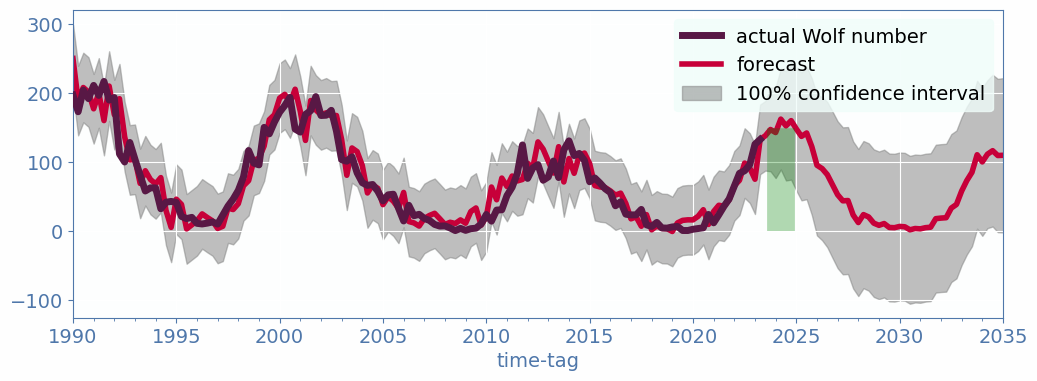

In [5]:
# Get and fit the data
sun_data = bulkhours.get_data("statsdata.sunspots", credit=True)["ssn"]
sun_model = smtsa.SARIMAX(sun_data, order=(3, 0, 10), seasonal_order=(1, 1, 0, 44)).fit() # Sun cycles: 11 years

# Plot the data
fig, ax = plt.subplots(figsize=(12, 4))
sun_data["1990":].plot(ax=ax, zorder=100, legend=True, label='actual Wolf number', alpha=1, lw=5)
sm.graphics.tsa.plot_predict(sun_model, start="1990", end="2035", plot_insample=True, ax=ax, alpha=0.001, lw=2)
ax.vlines(sun_model.forecast(10).idxmax(), 0, 160, color="green", ls="dashed", lw=20, alpha=0.3, zorder=110.1)

# Conclude
IPython.display.Markdown(f"<h3>Le meilleure période pour aller voir 😎 les aurores boreales 🌌 sera autour du {sun_model.forecast(10).idxmax().date()}</h3>")

# Reproduction de la loi de Moore💻


#### Computational capacity of the fastest supercomputers
- Raw data: [Supercomputer%20power%20(FLOPS)%20%E2%80%93%20TOP500%20Database.csv](https://github.com/owid/owid-datasets/dd7a4ecbb249f98028e25c304ef7d68de8979ea9/datasets/Supercomputer%20power%20(FLOPS)%20%E2%80%93%20TOP500%20Database/Supercomputer%20power%20(FLOPS)%20%E2%80%93%20TOP500%20Database.csv)  ([raw](https://raw.githubusercontent.com/owid/owid-datasets/dd7a4ecbb249f98028e25c304ef7d68de8979ea9/datasets/Supercomputer%20power%20(FLOPS)%20%E2%80%93%20TOP500%20Database/Supercomputer%20power%20(FLOPS)%20%E2%80%93%20TOP500%20Database.csv))
- Direct source: https://ourworldindata.org/grapher/supercomputer-power-flops

<details>
  <summary>Show columns info</summary>
> The number of floating-point operations per second (GigaFLOPS) by the fastest supercomputer in any given year

| Column   |      Info |
|-----------|:-----------|
| Entity |  |
| Floating-Point Operations per Second |  |

</details>
         


BulkHours database info: https://github.com/guydegnol/bulkhours/blob/main/data/README.md
bulkhours.get_data("supercomputers", credit=False)  # To stop showing this text


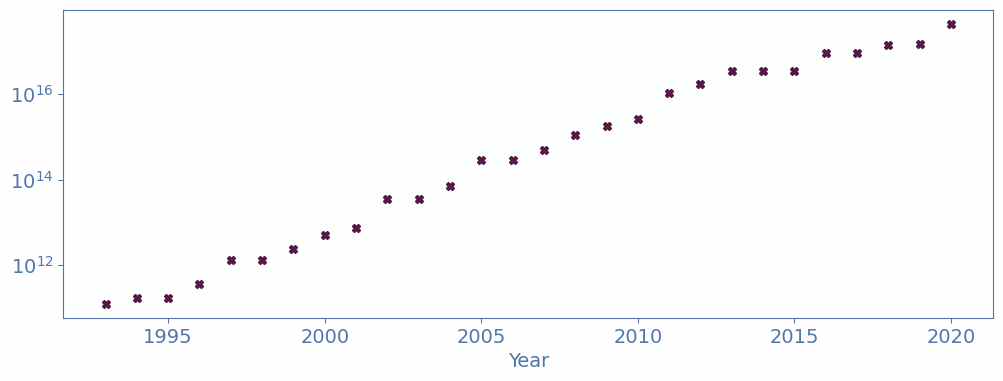

In [7]:
bulkhours.get_data("supercomputers", credit=True, index="Year")["Floating-Point Operations per Second"].plot(marker='X', linestyle='None', figsize=(12, 4))
plt.yscale("log");